# Descomposición del IMAE por componentes

*Material del curso EC4301 Macroeconometría*

Universidad de Costa Rica

**Profesor:  Randall Romero Aguilar**

Actualizado: 2025-Ago-07

!pip install bccr

!mamba install lxml


## Gráfico del IMAE

In [1]:
from bccr import SW
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

figpath = '../figures/'

plt.rc('figure', figsize=[12, 5])
plt.rc('savefig', bbox='tight', transparent=True)


SAVEFIG = False
EXPORTDATA = True

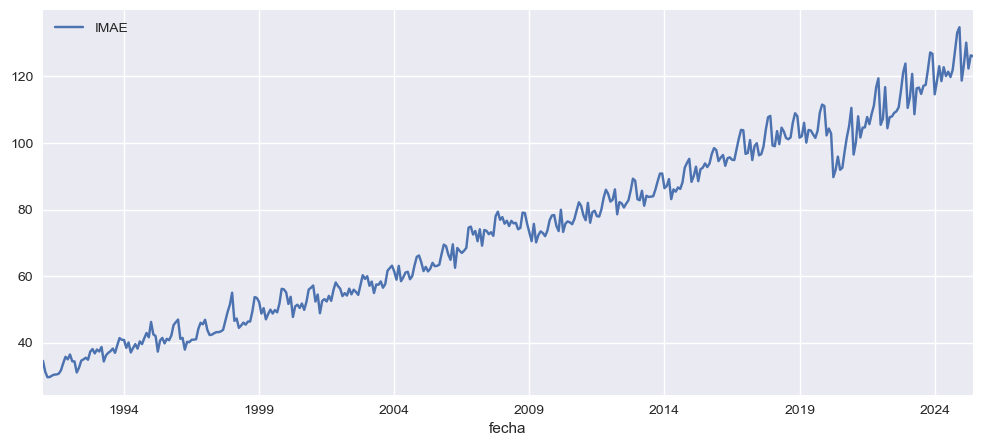

In [2]:
#imae = SW(IMAE=35449)  # serie anterior, no datos desde 2020-11
imae = SW(IMAE=87703)  # nueva serie
imae.plot();

## Componentes del IMAE

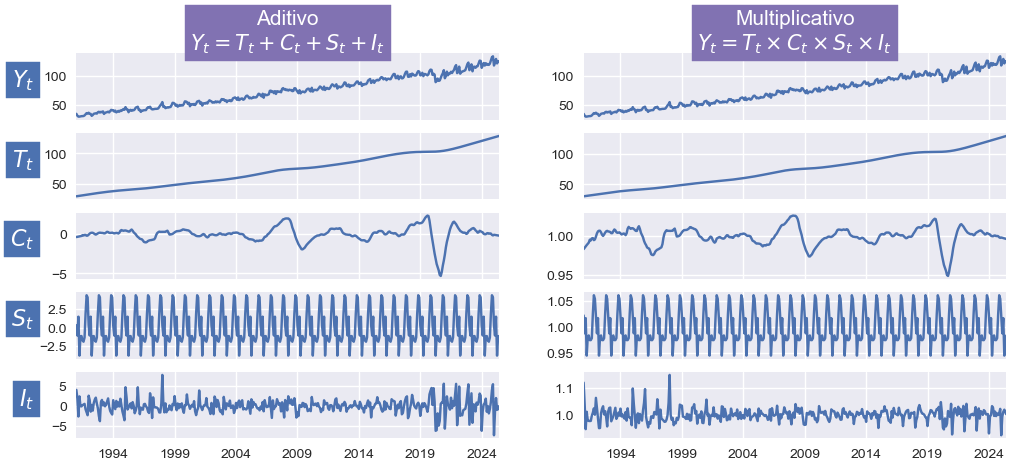

In [3]:
componentes = ['Serie\noriginal', 'Tendencia','Ciclo','Componente\nestacional','Componente\nirregular']

res = seasonal_decompose(imae, model='additive', period=12, extrapolate_trend='freq')
ciclo, tendencia = hpfilter(res.trend, lamb=14400)
additive = pd.concat([res.observed,tendencia, ciclo, res.seasonal, res.resid], axis=1)
additive.columns = componentes

res = seasonal_decompose(imae, model='multiplicative', period=12, extrapolate_trend='freq')
ciclo, tendencia = hpfilter(np.log(res.trend), lamb=14400)
multiplicative = pd.concat([res.observed, np.exp(tendencia), np.exp(ciclo), res.seasonal, res.resid], axis=1)
multiplicative.columns = componentes

descomp = pd.concat([additive, multiplicative], keys=['aditiva', 'multiplicativa'], axis=1)
descomp.index.name = ""
fig, axs = plt.subplots(5,2, figsize=[12,5], sharex=True)

for comp, ax in zip('YTCSI', axs[:,0]):
    ax.annotate(f'${comp}_t$',(-0.1,0.5), xycoords='axes fraction', ha='right', fontsize=16, color='white',backgroundcolor='C0')


for ((metodo, comp), serie), ax in zip(descomp.items(), axs.T.flatten()):   
    serie.plot(ax=ax)
    
for metodo, ax in zip(['Aditivo\n$Y_t = T_t + C_t + S_t + I_t$', 'Multiplicativo\n$Y_t = T_t \\times C_t \\times S_t \\times I_t$'], axs[0]):
    ax.annotate(metodo,(0.5,1.05), xycoords='axes fraction', ha='center', fontsize=15, color='white',backgroundcolor='C3')
    

if SAVEFIG:
    fig.savefig(figpath+'IMAE-descomposicion.png')


In [4]:
descomp.tail()

aditiva                                                                     multiplicativa                                                                   
        Serie\noriginal   Tendencia     Ciclo Componente\nestacional Componente\nirregular Serie\noriginal   Tendencia     Ciclo Componente\nestacional Componente\nirregular
                                                                                                                                                                             
2025-02      123.662482  126.304574 -0.102357              -1.069584             -1.470151      123.662482  126.444486  0.998084               0.987475              0.992305
2025-03      130.107331  126.772105 -0.124971               1.481651              1.978546      130.107331  126.937591  0.997712               1.016534              1.010612
2025-04      122.320281  127.239562 -0.147510              -3.789360             -0.982411      122.320281  127.432448  0.997329               0.944949              1.018525
2025-05      126.289009  127.706981 -0.170011              -1.187057             -0.060903      126.289009  127.929145  0.996934               0.980305              1.010109
2025-06      125.998802  128.174386 -0.192499              -1.134934             -0.848150      125.998802  128.427748  0.996528               0.983480              1.001042